In [69]:
# !pip install tensorflow

In [1]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.4.0


In [2]:
# Loading Fashion_MNIST dataset
mnist =  keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:

RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 


X_train /= 255

X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 


Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


In [75]:
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
Y_train.shape

(60000, 10)

## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [7]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 1s 1ms/step - loss: 1.0142 - accuracy: 0.6854 - val_loss: 0.7582 - val_accuracy: 0.7576
Epoch 2/70
750/750 [==============================] - 1s 1ms/step - loss: 0.7051 - accuracy: 0.7740 - val_loss: 0.6560 - val_accuracy: 0.7871
Epoch 3/70
750/750 [==============================] - 1s 1ms/step - loss: 0.6342 - accuracy: 0.7965 - val_loss: 0.6091 - val_accuracy: 0.7996
Epoch 4/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5952 - accuracy: 0.8062 - val_loss: 0.5806 - val_accuracy: 0.8087
Epoch 5/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5695 - accuracy: 0.8152 - val_loss: 0.5637 - val_accuracy: 0.8090
Epoch 6/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.8213 - val_loss: 0.5448 - val_accuracy: 0.8167
Epoch 7/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.8244 - val_loss: 0.5329 - val_accuracy: 0.8195
Epoch 

750/750 [==============================] - 1s 1ms/step - loss: 0.4172 - accuracy: 0.8584 - val_loss: 0.4346 - val_accuracy: 0.8515
Epoch 59/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8583 - val_loss: 0.4332 - val_accuracy: 0.8518
Epoch 60/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4161 - accuracy: 0.8580 - val_loss: 0.4340 - val_accuracy: 0.8510
Epoch 61/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4155 - accuracy: 0.8586 - val_loss: 0.4316 - val_accuracy: 0.8529
Epoch 62/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4148 - accuracy: 0.8584 - val_loss: 0.4332 - val_accuracy: 0.8530
Epoch 63/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4143 - accuracy: 0.8589 - val_loss: 0.4309 - val_accuracy: 0.8528
Epoch 64/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4137 - accuracy: 0.8585 - val_loss: 0.4317 - val_accuracy: 0.8530
Epoch 65/70

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


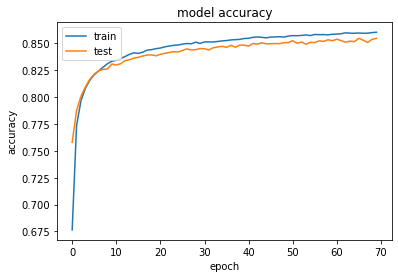

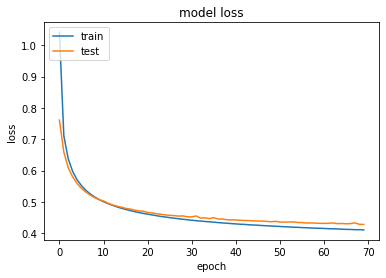

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 633us/step - loss: 0.4552 - accuracy: 0.8394
Test accuracy: 0.8393999934196472


In [82]:
model_0.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000194CF39C0D0>>

In [83]:
model_0.get_config()

{'name': 'sequential_7',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [84]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [85]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 1.0553 - accuracy: 0.6590 - val_loss: 0.6829 - val_accuracy: 0.7692
Epoch 2/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6143 - accuracy: 0.7916 - val_loss: 0.5631 - val_accuracy: 0.8079
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.8158 - val_loss: 0.5120 - val_accuracy: 0.8219
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.4979 - accuracy: 0.8272 - val_loss: 0.4842 - val_accuracy: 0.8303
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.8346 - val_loss: 0.4657 - val_accuracy: 0.8347
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.4575 - accuracy: 0.8401 - val_loss: 0.4534 - val_accuracy: 0.8382
Epoch 7/100
750/750 [==============================] - 1s 1ms/step - loss: 0.4437 - accuracy: 0.8441 - val_loss: 0.4449 - val_accuracy: 0.8406

Epoch 58/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2670 - accuracy: 0.9044 - val_loss: 0.3350 - val_accuracy: 0.8824
Epoch 59/100
750/750 [==============================] - 1s 2ms/step - loss: 0.2651 - accuracy: 0.9055 - val_loss: 0.3440 - val_accuracy: 0.8791
Epoch 60/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2635 - accuracy: 0.9060 - val_loss: 0.3381 - val_accuracy: 0.8832
Epoch 61/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2612 - accuracy: 0.9066 - val_loss: 0.3525 - val_accuracy: 0.8776
Epoch 62/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2602 - accuracy: 0.9081 - val_loss: 0.3326 - val_accuracy: 0.8840
Epoch 63/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2592 - accuracy: 0.9070 - val_loss: 0.3395 - val_accuracy: 0.8829
Epoch 64/100
750/750 [==============================] - 1s 2ms/step - loss: 0.2569 - accuracy: 0.9079 - val_loss: 0.3398 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


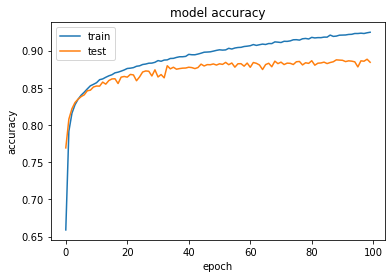

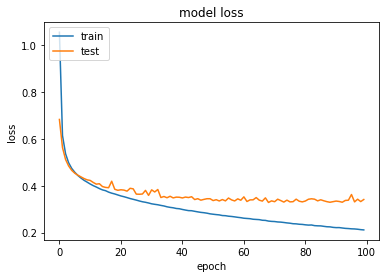

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [88]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 701us/step - loss: 0.3665 - accuracy: 0.8760
Test accuracy: 0.8759999871253967


In [89]:
model_1.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000194D1B56280>>

In [90]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.03325895,  0.05391167, -0.04943214, ...,  0.02002056,
          0.06318408, -0.00588498],
        [-0.03473715,  0.06365958, -0.00543499, ..., -0.04340696,
          0.05866134, -0.07192722],
        [ 0.0536279 , -0.08206926, -0.00802909, ..., -0.04701293,
         -0.01565019, -0.03304319],
        ...,
        [-0.04284783, -0.0558707 ,  0.07107718, ..., -0.08168382,
          0.05762822, -0.06334277],
        [-0.00739011,  0.01557972,  0.00139358, ...,  0.07307213,
          0.07167281, -0.08870583],
        [-0.01128443, -0.00951548, -0.04186971, ..., -0.07604194,
         -0.07536911,  0.06028552]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.01569514, -0.09213937, -0.01875742,  0.14119531,  0.0801582 ,
        -0.11290969,  0.00977792, -0.06167645, -0.10874166,  0.1284994 ,
         0.11842167, -0.11392102, -0.12731   ,  0.22781706,  0.1594

In [91]:
model_1.get_config()

{'name': 'sequential_8',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': No

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [10]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [93]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 1s 2ms/step - loss: 1.2389 - accuracy: 0.5671 - val_loss: 0.7240 - val_accuracy: 0.7454
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.7891 - accuracy: 0.7207 - val_loss: 0.6085 - val_accuracy: 0.7838
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.6829 - accuracy: 0.7608 - val_loss: 0.5447 - val_accuracy: 0.8062
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.6229 - accuracy: 0.7829 - val_loss: 0.5107 - val_accuracy: 0.8185
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5843 - accuracy: 0.7974 - val_loss: 0.4883 - val_accuracy: 0.8262
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.8053 - val_loss: 0.4680 - val_accuracy: 0.8322
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.8150 - val_loss: 0.4587 - val_accuracy: 0.8344
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


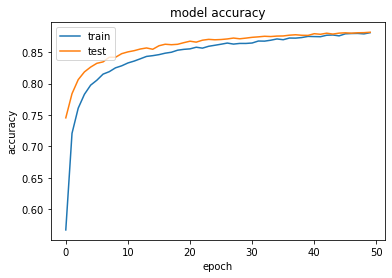

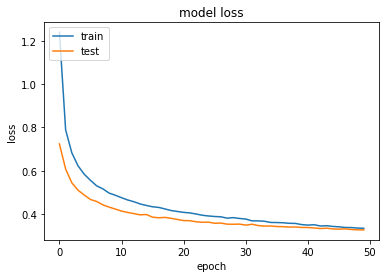

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 845us/step - loss: 0.3534 - accuracy: 0.8711
Test accuracy: 0.8711000084877014


In [97]:
model_2.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000194D1FAAAF0>>

In [98]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.0790506 ,  0.0641413 , -0.07513098, ...,  0.01638244,
         -0.03449422, -0.03951214],
        [-0.06244401,  0.04558434,  0.00223341, ...,  0.07312309,
         -0.02879902,  0.06766501],
        [-0.05547014,  0.02466598, -0.02251923, ..., -0.01224421,
         -0.00075189, -0.00479659],
        ...,
        [-0.00775151,  0.03589481,  0.00086895, ..., -0.06652331,
          0.00458825, -0.02508894],
        [ 0.06011348,  0.07273045, -0.04358231, ..., -0.03723943,
          0.01593693, -0.00991742],
        [ 0.0018012 ,  0.0098155 ,  0.04934638, ..., -0.06408095,
          0.07914467, -0.01323745]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 4.72908057e-02,  6.13102727e-02,  1.35463879e-01, -7.96900988e-02,
        -2.84707174e-02, -2.26051062e-02,  2.25583389e-01,  7.15958187e-03,
        -1.02773920e-01,  3.62567790e-02,  1.46501511e-01, 

In [99]:
model_2.get_config()

{'name': 'sequential_9',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_10',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,

###Improved Model 3: Changing the Optimizer - Adam

In [100]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [101]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.8730 - accuracy: 0.6875 - val_loss: 0.4946 - val_accuracy: 0.8225
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.8056 - val_loss: 0.4308 - val_accuracy: 0.8435
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4941 - accuracy: 0.8268 - val_loss: 0.4062 - val_accuracy: 0.8522
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4611 - accuracy: 0.8370 - val_loss: 0.3865 - val_accuracy: 0.8614
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4425 - accuracy: 0.8419 - val_loss: 0.3768 - val_accuracy: 0.8644
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.8468 - val_loss: 0.3716 - val_accuracy: 0.8643
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8510 - val_loss: 0.3611 - val_accuracy: 0.8707
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


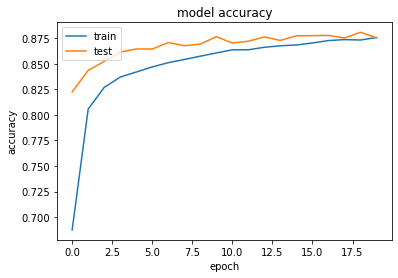

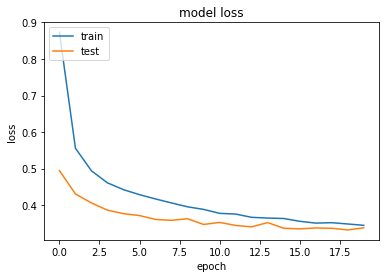

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 734us/step - loss: 0.3656 - accuracy: 0.8689
Test accuracy: 0.8689000010490417


In [105]:
model_3.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000194D2144B80>>

In [106]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.08285887,  0.05257443,  0.1309319 , ...,  0.14152984,
          0.0056238 , -0.00858842],
        [ 0.10000218,  0.15528606,  0.31631762, ...,  0.1319979 ,
          0.03173949, -0.03016668],
        [ 0.05037179,  0.0794704 ,  0.03325191, ...,  0.01586016,
         -0.05224111, -0.05675759],
        ...,
        [-0.19323987,  0.0885633 , -0.20404223, ..., -0.03603301,
         -0.01698568,  0.02379727],
        [-0.06621933, -0.11671062,  0.11497141, ..., -0.01985539,
          0.03596087,  0.0239926 ],
        [-0.05305648, -0.2021025 ,  0.23326175, ...,  0.20809813,
         -0.05221575, -0.10366484]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.30782837,  0.33476347, -0.10712437,  0.19782653,  0.45069215,
         0.5130542 ,  0.1965439 ,  0.05011651, -0.26360837, -0.12311608,
        -0.01015902, -0.01729458,  0.2300041 , -0.14343391,  0.0707

In [107]:
model_3.get_config()

{'name': 'sequential_10',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_12',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [108]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [109]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [110]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 4s 10ms/step - loss: 0.5630 - accuracy: 0.7976 - val_loss: 0.4104 - val_accuracy: 0.8501
Epoch 2/31
375/375 [==============================] - 4s 11ms/step - loss: 0.4116 - accuracy: 0.8503 - val_loss: 0.3641 - val_accuracy: 0.8689
Epoch 3/31
375/375 [==============================] - 4s 10ms/step - loss: 0.3750 - accuracy: 0.8613 - val_loss: 0.3573 - val_accuracy: 0.8731
Epoch 4/31
375/375 [==============================] - 4s 10ms/step - loss: 0.3559 - accuracy: 0.8701 - val_loss: 0.3461 - val_accuracy: 0.8743
Epoch 5/31
375/375 [==============================] - 4s 10ms/step - loss: 0.3369 - accuracy: 0.8748 - val_loss: 0.3267 - val_accuracy: 0.8797
Epoch 6/31
375/375 [==============================] - 4s 11ms/step - loss: 0.3232 - accuracy: 0.8801 - val_loss: 0.3270 - val_accuracy: 0.8814
Epoch 7/31
375/375 [==============================] - 4s 11ms/step - loss: 0.3127 - accuracy: 0.8830 - val_loss: 0.3201 - val_accuracy: 0.8841

In [111]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8914
Test accuracy: 0.8913999795913696


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


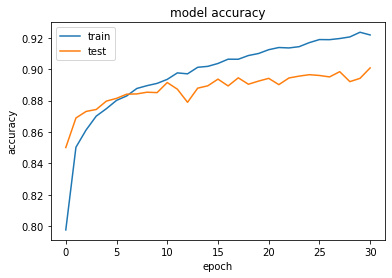

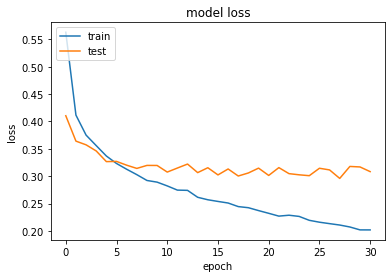

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [113]:
model_4.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000194D267BFA0>>

In [114]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.03964521,  0.00878854, -0.05217507, ..., -0.05283076,
          0.22830835,  0.05105715],
        [-0.17430374, -0.09682108,  0.03954024, ..., -0.12255411,
          0.07164392, -0.01515776],
        [-0.1437925 , -0.17185664,  0.01314818, ..., -0.29770395,
          0.08369412, -0.0576236 ],
        ...,
        [-0.01245911, -0.00678526,  0.05679952, ..., -0.06249752,
          0.11540459, -0.05884597],
        [-0.09230621,  0.00675695, -0.00717566, ..., -0.11966258,
         -0.06545012, -0.02288272],
        [-0.10038505, -0.02257493, -0.02581669, ..., -0.16535355,
         -0.21915482, -0.06119234]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 4.30345424e-02,  4.24913876e-02,  1.00365378e-01,  1.65522650e-01,
         6.96576908e-02,  4.50780168e-02, -1.11221142e-01, -2.75083678e-03,
         8.81315172e-02, -2.62990650e-02, -5.44568617e-03, 

In [115]:
model_4.get_config()

{'name': 'sequential_11',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_14',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True

###Improved Model 5: Manipulating the batch size

In [11]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [12]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2) 


Epoch 1/30
375/375 [==============================] - 4s 10ms/step - loss: 0.5688 - accuracy: 0.7956 - val_loss: 0.4268 - val_accuracy: 0.8423
Epoch 2/30
375/375 [==============================] - 4s 10ms/step - loss: 0.4110 - accuracy: 0.8482 - val_loss: 0.3932 - val_accuracy: 0.8560
Epoch 3/30
375/375 [==============================] - 4s 11ms/step - loss: 0.3779 - accuracy: 0.8614 - val_loss: 0.3457 - val_accuracy: 0.8737
Epoch 4/30
375/375 [==============================] - 4s 11ms/step - loss: 0.3534 - accuracy: 0.8707 - val_loss: 0.3431 - val_accuracy: 0.8726
Epoch 5/30
375/375 [==============================] - 4s 11ms/step - loss: 0.3395 - accuracy: 0.8735 - val_loss: 0.3322 - val_accuracy: 0.8800
Epoch 6/30
375/375 [==============================] - 4s 11ms/step - loss: 0.3219 - accuracy: 0.8810 - val_loss: 0.3295 - val_accuracy: 0.8801
Epoch 7/30
375/375 [==============================] - 4s 12ms/step - loss: 0.3099 - accuracy: 0.8836 - val_loss: 0.3176 - val_accuracy: 0.8838

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


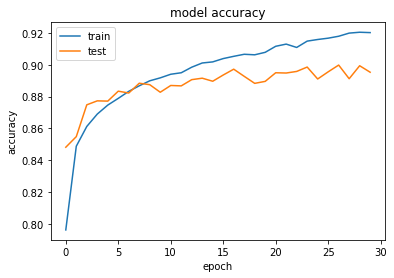

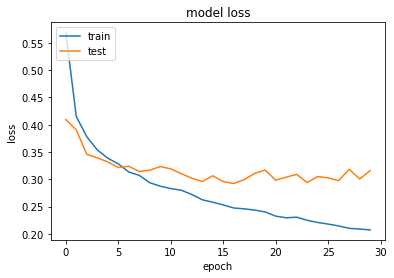

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8876
Test accuracy: 0.8876000046730042


In [121]:
model_5.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000194D26D48E0>>

In [122]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.00673709,  0.03055038,  0.02569522, ...,  0.01934258,
          0.01414125,  0.06082071],
        [-0.08159792, -0.06644854,  0.02538136, ...,  0.02537541,
          0.05949675, -0.02058889],
        [-0.12725377, -0.07417177,  0.10541984, ...,  0.00084325,
          0.00062287,  0.05682914],
        ...,
        [-0.02955808,  0.03228388, -0.07423636, ...,  0.17388344,
          0.02230744, -0.17164947],
        [-0.04576572,  0.01609697, -0.21808589, ..., -0.10901643,
          0.01918877, -0.14340498],
        [ 0.01939289, -0.03793643, -0.06537194, ..., -0.00269094,
          0.01371005, -0.06550875]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 1.72021370e-02, -4.02547941e-02, -2.92263292e-02, -1.15219988e-02,
        -1.52170258e-02, -3.94466847e-01,  3.18563193e-01,  2.18416288e-01,
         1.44994799e-02, -1.04354462e-02, -2.47149780e-01, 

In [123]:
model_5.get_config()

{'name': 'sequential_12',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_16',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True

###Improved Model 6: Adding Another Hidden Layer to the Model

In [124]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [125]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [126]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/30
750/750 [==============================] - 10s 13ms/step - loss: 0.5767 - accuracy: 0.7922 - val_loss: 0.4031 - val_accuracy: 0.8493
Epoch 2/30
750/750 [==============================] - 10s 14ms/step - loss: 0.4350 - accuracy: 0.8415 - val_loss: 0.3850 - val_accuracy: 0.8580
Epoch 3/30
750/750 [==============================] - 12s 16ms/step - loss: 0.3991 - accuracy: 0.8552 - val_loss: 0.3733 - val_accuracy: 0.8673
Epoch 4/30
750/750 [==============================] - 11s 15ms/step - loss: 0.3846 - accuracy: 0.8585 - val_loss: 0.3635 - val_accuracy: 0.8645
Epoch 5/30
750/750 [==============================] - 11s 15ms/step - loss: 0.3652 - accuracy: 0.8685 - val_loss: 0.3630 - val_accuracy: 0.8655
Epoch 6/30
750/750 [==============================] - 11s 15ms/step - loss: 0.3525 - accuracy: 0.8703 - val_loss: 0.3469 - val_accuracy: 0.8767
Epoch 7/30
750/750 [==============================] - 11s 14ms/step - loss: 0.3414 - accuracy: 0.8742 - val_loss: 0.3407 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


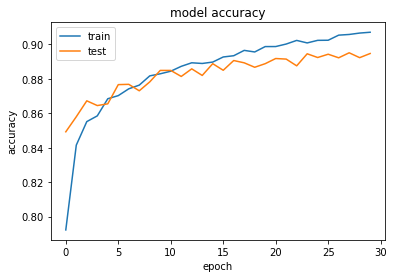

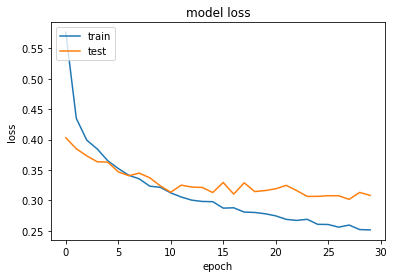

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [128]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.8905
Test accuracy: 0.890500009059906


In [129]:
model_6.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000194D364BB80>>

In [130]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-6.23570159e-02,  1.26773566e-02,  4.78366017e-03, ...,
          3.68972607e-02,  5.52888140e-02, -1.41616344e-01],
        [-3.17507349e-02, -5.38009293e-02, -2.60997135e-02, ...,
         -5.56732304e-02, -3.93203273e-03, -4.46056187e-01],
        [-4.27209735e-02, -1.83457330e-01,  2.34971289e-03, ...,
         -4.30531055e-02, -2.80186511e-03, -3.51666868e-01],
        ...,
        [-4.78051789e-02, -5.25286011e-02, -6.65267333e-02, ...,
          2.45539006e-02,  7.26146847e-02,  3.99186574e-02],
        [-3.01384851e-02,  5.08419722e-02, -2.45890929e-04, ...,
         -6.98455572e-02,  3.80393490e-02, -2.22841546e-01],
        [ 5.65480441e-02,  1.23928220e-03, -1.30379209e-02, ...,
          1.02237025e-02,  4.86519821e-02, -1.63060784e-01]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-1.11590736e-01, -8.28444883e-02, -3.23202424e-02,  3.70491

In [131]:
model_6.get_config()

{'name': 'sequential_13',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_18',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True

In [ ]:
#classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

In [40]:
y_pred=model_5.predict(X_test)

In [41]:
y_pred.shape

(10000, 10)

In [38]:
import numpy as np
result = np.argmax(model_5.predict(X_test), axis=-1)

In [39]:
result

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [30]:
Classes[result[0]]

'Ankle Boot'

In [25]:
len(result)

10000

In [32]:
prd=[]
for i in range(len(result)):
    prd.append(Classes[result[i]])

In [33]:
prd

['Ankle Boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker',
 'Coat',
 'Sandal',
 'Sneaker',
 'Dress',
 'Coat',
 'Trouser',
 'Pullover',
 'Pullover',
 'Bag',
 'T-shirt/top',
 'Pullover',
 'Sandal',
 'Sneaker',
 'Sandal',
 'Trouser',
 'Pullover',
 'Shirt',
 'T-shirt/top',
 'Ankle Boot',
 'Coat',
 'Bag',
 'Bag',
 'Dress',
 'Dress',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sandal',
 'Sneaker',
 'Ankle Boot',
 'T-shirt/top',
 'Trouser',
 'Shirt',
 'Ankle Boot',
 'Shirt',
 'Sneaker',
 'Pullover',
 'Trouser',
 'Pullover',
 'Shirt',
 'Coat',
 'Pullover',
 'Sandal',
 'Bag',
 'Pullover',
 'Pullover',
 'Bag',
 'Coat',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sneaker',
 'Bag',
 'Sandal',
 'Trouser',
 'Trouser',
 'Shirt',
 'Coat',
 'Sneaker',
 'Bag',
 'Sneaker',
 'T-shirt/top',
 'Pullover',
 'Shirt',
 'Pullover',
 'Dress',
 'Trouser',
 'Pullover',
 'Bag',
 'Coat',
 'Trouser',
 'Bag',
 'Sandal',
 'Ankle Boot',
 'Sandal',
 'T-shirt/top',
 'Dress',
 'P

In [136]:
df=pd.DataFrame(y_pred)

In [137]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.772281e-10,1.875508e-10,8.462211e-10,3.833485e-11,4.901942e-11,6.544290e-05,1.786206e-09,2.160639e-03,5.217662e-11,9.977739e-01
1,6.562144e-09,2.813118e-18,9.999704e-01,9.430552e-15,2.589192e-05,1.035267e-18,3.747416e-06,1.144672e-21,6.123739e-15,3.171857e-22
2,1.793963e-15,1.000000e+00,1.337225e-21,2.145594e-15,8.417387e-21,8.918955e-23,8.643028e-16,1.868776e-35,8.525734e-23,2.163393e-25
3,8.138289e-16,1.000000e+00,1.799379e-20,1.666489e-12,1.237124e-19,1.307850e-20,3.996810e-14,8.987872e-32,7.481721e-22,3.483797e-23
4,4.382387e-01,1.438676e-09,3.831098e-03,3.316794e-05,1.084241e-03,1.137555e-05,5.567920e-01,1.105408e-07,9.368216e-06,6.458175e-08


In [19]:
Classes=[ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [141]:
df.columns=Classes

In [142]:
df.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle Boot
0,1.772281e-10,1.875508e-10,8.462211e-10,3.833485e-11,4.901942e-11,6.544290e-05,1.786206e-09,2.160639e-03,5.217662e-11,9.977739e-01
1,6.562144e-09,2.813118e-18,9.999704e-01,9.430552e-15,2.589192e-05,1.035267e-18,3.747416e-06,1.144672e-21,6.123739e-15,3.171857e-22
2,1.793963e-15,1.000000e+00,1.337225e-21,2.145594e-15,8.417387e-21,8.918955e-23,8.643028e-16,1.868776e-35,8.525734e-23,2.163393e-25
3,8.138289e-16,1.000000e+00,1.799379e-20,1.666489e-12,1.237124e-19,1.307850e-20,3.996810e-14,8.987872e-32,7.481721e-22,3.483797e-23
4,4.382387e-01,1.438676e-09,3.831098e-03,3.316794e-05,1.084241e-03,1.137555e-05,5.567920e-01,1.105408e-07,9.368216e-06,6.458175e-08


In [144]:
df.shape

(10000, 10)

In [147]:
df['max_value'] = df.idxmax(axis=1)

In [148]:
df.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle Boot,max_value
0,1.772281e-10,1.875508e-10,8.462211e-10,3.833485e-11,4.901942e-11,6.544290e-05,1.786206e-09,2.160639e-03,5.217662e-11,9.977739e-01,Ankle Boot
1,6.562144e-09,2.813118e-18,9.999704e-01,9.430552e-15,2.589192e-05,1.035267e-18,3.747416e-06,1.144672e-21,6.123739e-15,3.171857e-22,Pullover
2,1.793963e-15,1.000000e+00,1.337225e-21,2.145594e-15,8.417387e-21,8.918955e-23,8.643028e-16,1.868776e-35,8.525734e-23,2.163393e-25,Trouser
3,8.138289e-16,1.000000e+00,1.799379e-20,1.666489e-12,1.237124e-19,1.307850e-20,3.996810e-14,8.987872e-32,7.481721e-22,3.483797e-23,Trouser
4,4.382387e-01,1.438676e-09,3.831098e-03,3.316794e-05,1.084241e-03,1.137555e-05,5.567920e-01,1.105408e-07,9.368216e-06,6.458175e-08,Shirt


In [152]:
Predicted_Answers=df["max_value"]

In [153]:
Predicted_Answers

0       Ankle Boot
1         Pullover
2          Trouser
3          Trouser
4            Shirt
           ...    
9995    Ankle Boot
9996       Trouser
9997           Bag
9998       Trouser
9999        Sandal
Name: max_value, Length: 10000, dtype: object